# Giraffe Elephant Image Processing 

# URL of Images: https://drive.google.com/file/d/1mVVJE7Ck81xNQXB4cayawbXTBoa_FKuo/view?usp=sharing

## The images are in different 

### These images have to be in same directory named 'Images' for using.

#### Last, this 'Images' folder has to be in same directory with .ipynb file, otherwise it doesn't run.


In [1]:
import os, shutil
def createFile(PATH):
    if(not(os.path.exists(PATH) and os.access(PATH, os.R_OK))):
        os.mkdir(PATH)

In [2]:
def lenDirectoryElements(PATH):
    return len(os.listdir(PATH))

In [3]:
#Plot grafiği için tekrarlı kod yazılmasın diye.
import matplotlib.pyplot as plt
def showPlots(generatedModel):
    acc = generatedModel.history['acc']
    val_acc = generatedModel.history['val_acc']
    loss = generatedModel.history['loss']
    val_loss = generatedModel.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [4]:
#Ayrım yapılmamış resim klasörü
non_processing_data_dir = '.\Images'

#İşlem yapılacak klasörü
processing_data_dir = '.\ProcessingDatas'

createFile(processing_data_dir)

#Train - Test - Validation klasör oluşturma
train_dir = os.path.join(processing_data_dir, 'train')
validation_dir = os.path.join(processing_data_dir, 'validation')
test_dir = os.path.join(processing_data_dir, 'test')

createFile(train_dir)
createFile(validation_dir)
createFile(test_dir)

#Eğitim için fil ve zürafa klasörleri oluşturuluyor.
train_elephant_dir = os.path.join(train_dir, 'elephant')
train_giraffe_dir = os.path.join(train_dir, 'giraffe')
createFile(train_elephant_dir)
createFile(train_giraffe_dir)

#Değerleme işlemi için fil ve zürafa klasörleri oluşturuluyor
validation_elephant_dir = os.path.join(validation_dir, 'elephant')
validation_giraffe_dir = os.path.join(validation_dir, 'giraffe')
createFile(validation_elephant_dir)
createFile(validation_giraffe_dir)

#Sınama için fil ve zürafa klasörleri oluşturuluyor.
test_elephant_dir = os.path.join(test_dir, 'elephant')
test_giraffe_dir = os.path.join(test_dir, 'giraffe')
createFile(test_elephant_dir)
createFile(test_giraffe_dir)

In [5]:
#Resimler Train validation test klasörlerine gruplandırma ile sırasıyla 100 50 50 fotoğraf atılıyor.
fnames = ['elephant ({})_120x80.jpg'.format(i+1) for i in range(100)]
for fname in fnames:
    src = os.path.join(non_processing_data_dir, fname)
    dst = os.path.join(train_elephant_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['elephant ({})_120x80.jpg'.format(i+1) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(non_processing_data_dir, fname)
    dst = os.path.join(validation_elephant_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['elephant ({})_120x80.jpg'.format(i+1) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(non_processing_data_dir, fname)
    dst = os.path.join(test_elephant_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['Giraffe ({})_120x80.jpg'.format(i+1) for i in range(100)]
for fname in fnames:
    src = os.path.join(non_processing_data_dir, fname)
    dst = os.path.join(train_giraffe_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['Giraffe ({})_120x80.jpg'.format(i+1) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(non_processing_data_dir, fname)
    dst = os.path.join(validation_giraffe_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['Giraffe ({})_120x80.jpg'.format(i+1) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(non_processing_data_dir, fname)
    dst = os.path.join(test_giraffe_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('Total training elephant images:', lenDirectoryElements(train_elephant_dir))
print('Total validation elephant images: ', lenDirectoryElements(validation_elephant_dir))
print('Total test elephant images:', lenDirectoryElements(test_elephant_dir))
print('Total training giraffe images:', lenDirectoryElements(train_giraffe_dir))
print('Total validation giraffe images:', lenDirectoryElements(validation_giraffe_dir))
print('Total test giraffe images:', lenDirectoryElements(test_giraffe_dir))

Total training elephant images: 100
Total validation elephant images:  50
Total test elephant images: 50
Total training giraffe images: 100
Total validation giraffe images: 50
Total test giraffe images: 50


In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(120, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 78, 32)       896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 39, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 8, 128)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 6, 128)       

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(120, 80),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(120, 80),
        batch_size=5,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 120, 80, 3)
labels batch shape: (5,)


In [10]:
standartEpoch = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 63ms/step - loss: 0.6501 - acc: 0.6080 - val_loss: 0.5689 - val_acc: 0.7640
Epoch 2/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5278 - acc: 0.7400 - val_loss: 0.3712 - val_acc: 0.7720
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 0.4375 - acc: 0.7820 - val_loss: 0.3063 - val_acc: 0.7680
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.3743 - acc: 0.8280 - val_loss: 1.0408 - val_acc: 0.7800
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.3334 - acc: 0.8420 - val_loss: 0.1966 - val_acc: 0.7600
Epoch 6/30
100/100 [==============================] - 5s 53ms/step - loss: 0.2767 - acc: 0.8820 - val_loss: 0.0608 - val_acc: 0.8320
Epoch 7/30
100/100 [==============================] - 6s 58ms/step - loss: 0.2422 - acc: 0.9040 - val_loss: 0.3226 - val_acc: 0.8040
Epoch 8/30
100/100 [==============================] - 6s 56ms/step - 

In [11]:
model.save('ElephantOrGiraffeStandartEpoch.h5')

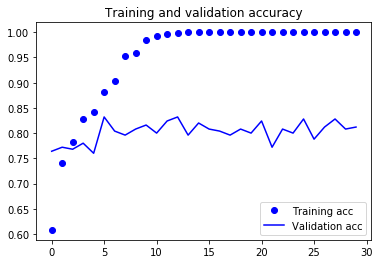

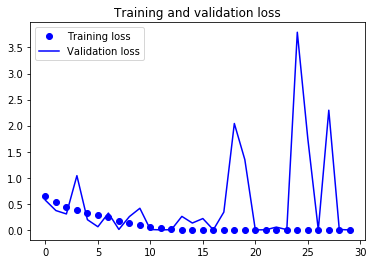

In [12]:
showPlots(standartEpoch)

Görüldüğü üzere doğruluk grafiğinde %100 başarı oranı mükemmel ama yanlış için. 

```sh
Aşırı uyma (over fitting) görülüyor, 
```

Doğrulama doğruluk oranı 75 80 lerde eğitim doğruluk oranı %100 
Dünya'da zürafa ve fil açısından tek resim verilerindeki hayvanlar olmadığı sürece yanlış bir öğrenim durumudur.

Kayıp grafiğinde de aynı mükemmellik bulunmakta sonlara doğru doğrulama kısmı biraz daha gerçekçilik gösterse de bu yetersiz kalıyor.

Bu şu anlama geliyor, kısaca veriler yetersiz kalıyor.

In [13]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [14]:
from keras.preprocessing import image

def augmentImages(image_dir):

    fnames = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]

    # We pick one image to "augment"
    img_path = fnames[3]

    # Read the image and resize it
    img = image.load_img(img_path, target_size=(120, 80))

    # Convert it to a Numpy array with shape (150, 150, 3)
    x = image.img_to_array(img)

    # Reshape it to (1, 150, 150, 3)
    x = x.reshape((1,) + x.shape)

    # The .flow() command below generates batches of randomly transformed images.
    # It will loop indefinitely, so we need to `break` the loop at some point!
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 4 == 0:
            break

    plt.show()


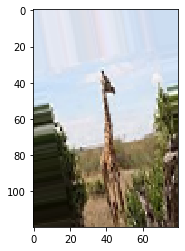

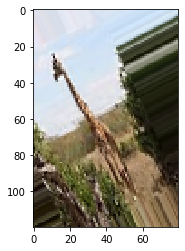

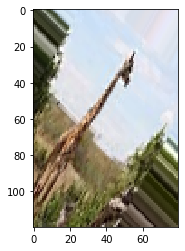

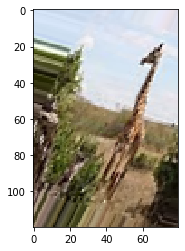

In [15]:
augmentImages(train_giraffe_dir)

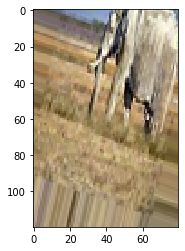

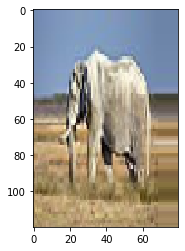

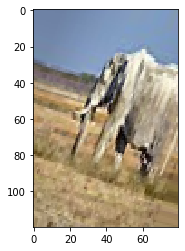

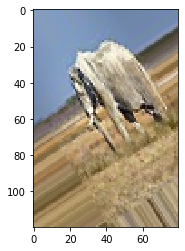

In [16]:
augmentImages(train_elephant_dir)

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(120, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(120, 80),
        batch_size=5,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(120, 80),
        batch_size=5,
        class_mode='binary')

augmentedEpoch = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 7s 66ms/step - loss: 0.6916 - acc: 0.5200 - val_loss: 0.6679 - val_acc: 0.6440
Epoch 2/30
100/100 [==============================] - 6s 57ms/step - loss: 0.6685 - acc: 0.5840 - val_loss: 0.6296 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 5s 55ms/step - loss: 0.6365 - acc: 0.6200 - val_loss: 0.7445 - val_acc: 0.5160
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6292 - acc: 0.6400 - val_loss: 0.5026 - val_acc: 0.7440
Epoch 5/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5902 - acc: 0.6980 - val_loss: 0.4523 - val_acc: 0.7480
Epoch 6/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6014 - acc: 0.6760 - val_loss: 0.3579 - val_acc: 0.7960
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5846 - acc: 0.6860 - val_loss: 0.3723 - val

In [19]:
model.save('augmentationEpoch.h5')

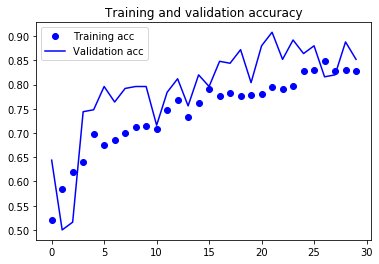

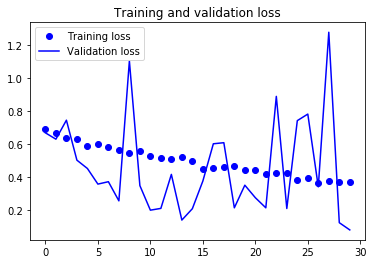

In [20]:
showPlots(augmentedEpoch)

Baştaki sıradan epoch eğitiminden sonra grafiklerde daha gerçekçi bir durum oluşmakta, Doğrulama ve eğitme doğruluk oranlarına bakıldığında birbirine bazı yerler hariç yakın seyretmekte. 


Hata durumlarına baktığımızda eğitim kümesinin belli bir eğimle gittiğini ve doğrulama kısmının farklı durumlara çıktığını görüyoruz. Doğrulama kısmında çok uç hata durumları çıkmakta. Yapılanların yeterli olmaması durumu olabilir verilerin sorunlu olması anlamına da gelebilir.

```sh
Doğruluk kısmının bu sonuçla çıkması, daha çok eşleşme durumu yapılmasından dolayı olabilir bundan dolayı nöron durumlarında göz ardı etmemiz gerekenler olduğu anlamına geliyor olabilir. Sonlara doğruluk kısmında tavan değerlere yaklaşmaktadır bu aşırı uyma durumu olduğu anlamına gelir.
```
#### Not : Gerçeklikten kasıt, kullanılabilecek bir algoritmaya yakınlık anlamındadır.


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(120, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout katmanını ekliyoruz.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
dropOutEpoch = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 55ms/step - loss: 0.6959 - acc: 0.5200 - val_loss: 0.6924 - val_acc: 0.6080
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6890 - acc: 0.5380 - val_loss: 0.7161 - val_acc: 0.6200
Epoch 3/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6754 - acc: 0.6040 - val_loss: 0.7216 - val_acc: 0.5880
Epoch 4/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6776 - acc: 0.5560 - val_loss: 0.6731 - val_acc: 0.5200
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6584 - acc: 0.6080 - val_loss: 0.6357 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6547 - acc: 0.6160 - val_loss: 0.8752 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6262 - acc: 0.6500 - val_loss: 0.8513 - val_acc: 0.7360
Epoch 8/30
100/100 [==============================] - 5s 51ms/step - 

In [23]:
model.save('dropOutEpoch.h5')

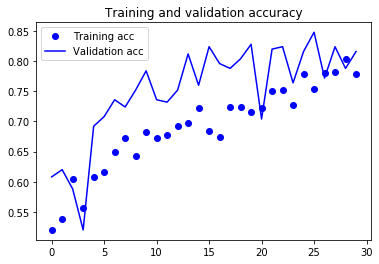

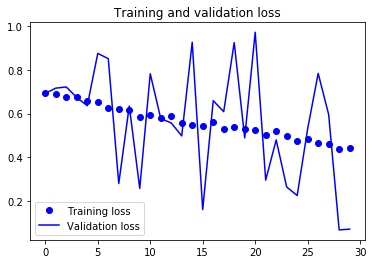

In [24]:
showPlots(dropOutEpoch)

Doğruluk kısmındaki başlardaki kaos ortamı haricinde doğrulama ve eğitim kısmının doğruluk oranlarının birbirine daha yakınlaştığı söylenebilir. Aynı doğrultuda artmasının yaşandığı söylenebilir. Önceki grafiğe göre daha yayılımlı bir grafik görülmekte. Önceki grafikte daha orantısal gitmekteydi. Bu grafikte mümkün olduğunca aşırı uyumadan kaçınıldığı söylenebilir.

```sh
Daha az aşırı uyma durumunun olduğu doğruluk oranının artık tavan değeri görmemesi sayesinde belli olmaktadır.
Daha iyi bir dropout değeriyle daha güzel sonuçlar elde edilebilir.
Hata grafiği daha istikrarlı hale gelmiştir.
Kısacası aşırı uyma durumu daha da azaltılmıştır. 
```


In [25]:
from keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(monitor='val_acc', mode='max', verbose = 1)

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(120, 80, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout katmanını ekliyoruz.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
limitedEpoch = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      callbacks=[earlystop_callback],
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6988 - acc: 0.4880 - val_loss: 0.6852 - val_acc: 0.5480
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6870 - acc: 0.5600 - val_loss: 0.6953 - val_acc: 0.6760
Epoch 3/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6838 - acc: 0.5520 - val_loss: 0.9214 - val_acc: 0.5120
Epoch 00003: early stopping


Callbacks kısmına early stopping kondu. Nedeni her çalıştırımda farklı değerler çıkacağı için bir earlystop konması daha mantıklıydı. Bunun grafiği alttaki grafiklerde verilecektir.
### Tüm durum karşılaştırmaları

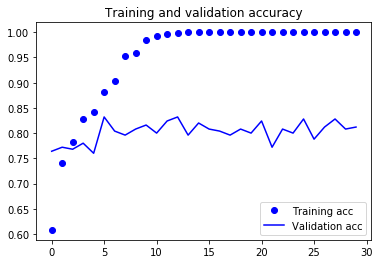

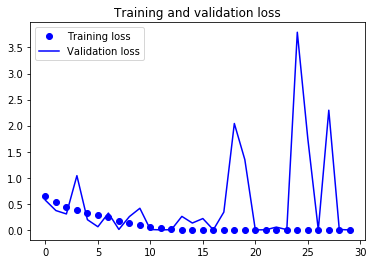

In [28]:
showPlots(standartEpoch)

# Aşırı uyma bariz bellidir.

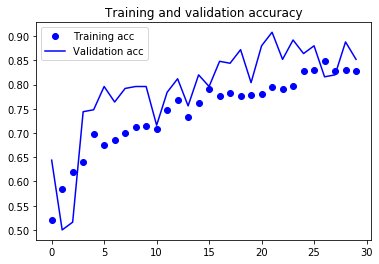

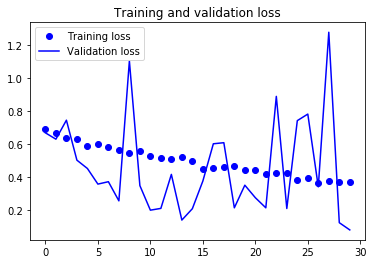

In [29]:
showPlots(augmentedEpoch)

# Farklı açılardan resim üretimi sayesinde aşırı uyuma biraz engellenmiş durumdadır.

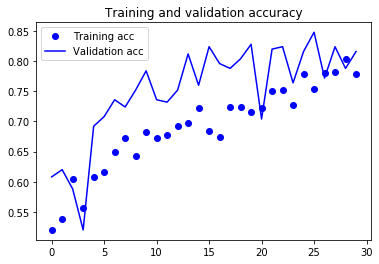

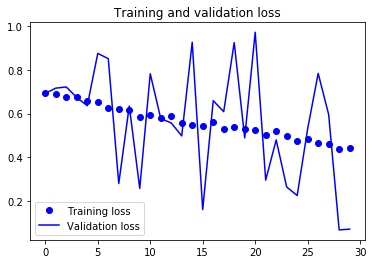

In [30]:
showPlots(dropOutEpoch)

# Sadece farklı açılardan resim üretimi olduğunda doğrulamada %90 lara varan eğitimde %85 lere varan doğruluk durumu vardı az veri olduğu aşırı eğitim olduğu anlamına gelir. Dropout sayesinde bu aşırı uyma daha da engellenmiş oldu.

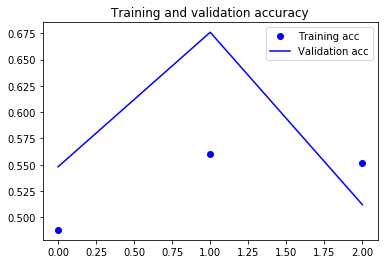

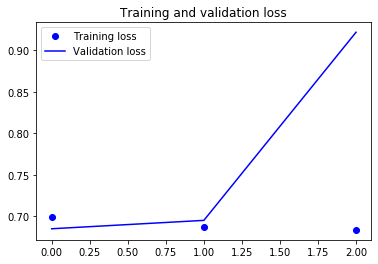

In [31]:
showPlots(limitedEpoch)

3.Epoch'ta durdu nedeni 3.Epoch'ta doğrulama kısmında düşüş yaşanmıştı. Çalıştırmadan çalıştırmaya değişebilecek bir grafik. Burada şu yorum yapılabilir:
### -Veriler daha kaliteli olmalı ki bu daha fazla eğitim zamanı anlamına gelir.
### -Dropout kısmı düşürülmeli 0.4 0.3 0.2 0.1' den en uygunu bulunmalıdır.
### -Erken kesme daha hızlı eğitim ve dah az maliyet sağlamıştır. Tabii bunun karşılığında daha az başarı oranına da sebebiyet vermiştir. 
### Kesin olarak şu söylenebilir aşırı uyma durumu engellenmiştir ama bu amaçtan dolayı da başarı oranından ciddi taviz verilmiştir.

In [32]:
def compileWithDropout(dropOutValue):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(120, 80, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropOutValue)) # Dropout katmanını ekliyoruz.
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])

    limitedEpoch = model.fit_generator(
          train_generator,
          steps_per_epoch=100,
          epochs=30,
          callbacks=[earlystop_callback],
          validation_data=validation_generator,
          validation_steps=50)

    showPlots(limitedEpoch)

Epoch 1/30
100/100 [==============================] - 5s 55ms/step - loss: 0.6916 - acc: 0.5280 - val_loss: 0.6920 - val_acc: 0.7200
Epoch 2/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6648 - acc: 0.6340 - val_loss: 0.9121 - val_acc: 0.6360
Epoch 00002: early stopping


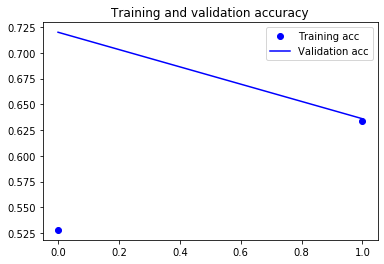

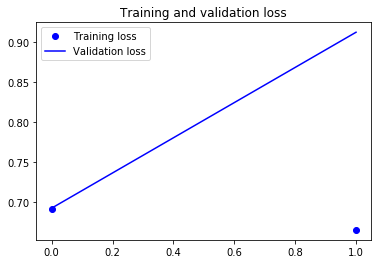

Epoch 1/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6965 - acc: 0.4780 - val_loss: 0.6927 - val_acc: 0.5200
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6841 - acc: 0.5740 - val_loss: 0.6554 - val_acc: 0.6640
Epoch 3/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6688 - acc: 0.6220 - val_loss: 0.6603 - val_acc: 0.5760
Epoch 00003: early stopping


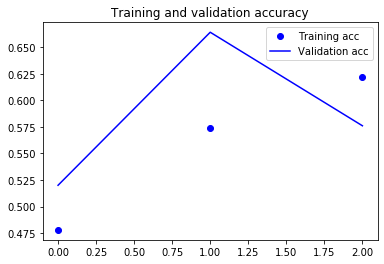

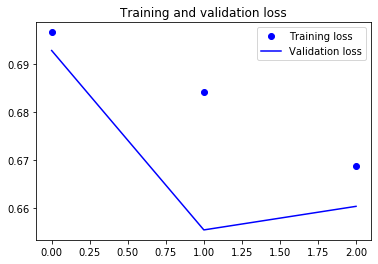

Epoch 1/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6943 - acc: 0.5060 - val_loss: 0.6449 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6771 - acc: 0.5600 - val_loss: 0.5853 - val_acc: 0.5120
Epoch 00002: early stopping


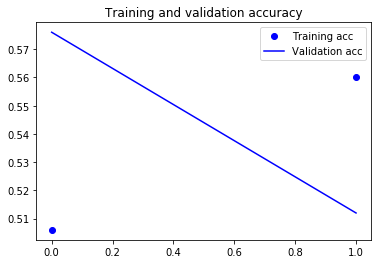

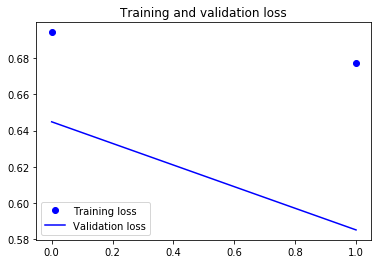

Epoch 1/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6965 - acc: 0.5020 - val_loss: 0.6837 - val_acc: 0.5080
Epoch 2/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6884 - acc: 0.5440 - val_loss: 0.7147 - val_acc: 0.5720
Epoch 3/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6698 - acc: 0.5900 - val_loss: 0.8227 - val_acc: 0.6920
Epoch 4/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6617 - acc: 0.5920 - val_loss: 0.6610 - val_acc: 0.7000
Epoch 5/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6520 - acc: 0.6300 - val_loss: 0.4558 - val_acc: 0.6520
Epoch 00005: early stopping


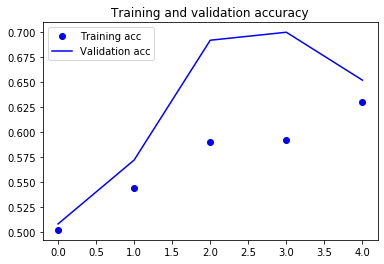

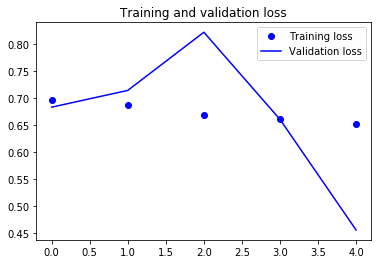

In [33]:
for i in range(1,5):
    compileWithDropout(i/10)

### En iyi dropout değerimiz 0.4 çıktı
Başarı kısmında doğrulama ve eğitim kısmının 3. epoch'a kadar uyumlu gittiği görülmekte.
Hata kısmında sonlara doğru doğru gittiği görülmekte.

Sonuç olarak
```sh
Aşırı uymaya karşı önlem alınmış oldu çünkü daha çok epoch sayısı daha çok doğruluk anlamına gelecekti doğru ama bu aşırı uyma anlamına da gelecekti. Epoch kesme sayesinde doğruluk daha alt seviyeden başlamış oldu ve daha istikrarlı ve gerçekçi artış oldu. Diğer grafiklerdeki tuhaf dalgalanmaların etkisi giderildi. Model eğitimi maliyeti azaltıldı.
```

### En iyi dropout değeriyle epoch kesme durumu en iyi hale gelmiştir. Aşırı uyma durumundan kaçınmak için doğruluk oranından taviz verilmişti dropout değeriyle bu taviz makul seviyelere düşürülmüştür.

Daha iyi verilerle bu grafiklerin artışı sağlanabilir.